## Practical No 02

Data Wrangling II
- Create an “Academic performance” dataset of students and perform the following operations using Python.

1. Scan all variables for missing values and inconsistencies. If there are missing values and/or inconsistencies, use any of the suitable techniques to deal with them.

2. Scan all numeric variables for outliers. If there are outliers, use any of the suitable techniques to deal with them.

3. Apply data transformations on at least one of the variables. The purpose of this transformation should be one of the following reasons: to change the scale for better understanding of the variable, to convert a non-linear relation into a linear one, or to decrease the skewness and convert the distribution into a normal distribution.

- Reason and document your approach properly.



In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_excel('data_academic_performance.xlsx') 
df

,COD_S11,GENDER,EDU_FATHER,EDU_MOTHER,OCC_FATHER,OCC_MOTHER,STRATUM,SISBEN,PEOPLE_HOUSE,Unnamed: 9,...,CC_PRO,ENG_PRO,WC_PRO,FEP_PRO,G_SC,PERCENTILE,2ND_DECILE,QUARTILE,SEL,SEL_IHE
0,SB11201210000129,F,Incomplete Professional Education,Complete technique or technology,Technical or professional level employee,Home,Stratum 4,It is not classified by the SISBEN,Three,NaN,...,71,93,79,181,180,91,5,4,2,2
1,SB11201210000137,F,Complete Secundary,Complete professional education,Entrepreneur,Independent professional,Stratum 5,It is not classified by the SISBEN,Three,NaN,...,86,98,78,201,182,92,5,4,4,4
2,SB11201210005154,M,Not sure,Not sure,Independent,Home,Stratum 2,Level 2,Five,NaN,...,18,43,22,113,113,7,1,1,1,1
3,SB11201210007504,F,Not sure,Not sure,Other occupation,Independent,Stratum 2,It is not classified by the SISBEN,Three,NaN,...,76,80,48,137,157,67,4,3,2,2
4,SB11201210007548,M,Complete professional education,Complete professional education,Executive,Home,Stratum 4,It is not classified by the SISBEN,One,NaN,...,98,100,71,189,198,98,5,4,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12406,SB11201420568705,M,Ninguno,Complete Secundary,Other occupation,Auxiliary or Administrative,Stratum 2,It is not classified by the SISBEN,Six,NaN,...,86,87,65,142,176,88,5,4,2,2
12407,SB11201420573045,M,Complete professional education,Complete Secundary,Executive,Other occupation,Stratum 2,Level 2,Five,NaN,...,44,11,0,127,107,4,1,1,4,2
12408,SB11201420578809,M,Complete technique or technology,Complete technique or technology,Retired,Home,Stratum 2,Level 2,Five,NaN,...,90,81,87,192,188,95,5,4,2,2
12409,SB11201420578812,F,Complete professional education,Complete professional education,Independent professional,Small entrepreneur,Stratum 3,It is not classified by the SISBEN,Seven,NaN,...,51,8,42,121,146,50,3,3,3,2


In [3]:
df.head() # It's showing top 5 result

,COD_S11,GENDER,EDU_FATHER,EDU_MOTHER,OCC_FATHER,OCC_MOTHER,STRATUM,SISBEN,PEOPLE_HOUSE,Unnamed: 9,...,CC_PRO,ENG_PRO,WC_PRO,FEP_PRO,G_SC,PERCENTILE,2ND_DECILE,QUARTILE,SEL,SEL_IHE
0,SB11201210000129,F,Incomplete Professional Education,Complete technique or technology,Technical or professional level employee,Home,Stratum 4,It is not classified by the SISBEN,Three,NaN,...,71,93,79,181,180,91,5,4,2,2
1,SB11201210000137,F,Complete Secundary,Complete professional education,Entrepreneur,Independent professional,Stratum 5,It is not classified by the SISBEN,Three,NaN,...,86,98,78,201,182,92,5,4,4,4
2,SB11201210005154,M,Not sure,Not sure,Independent,Home,Stratum 2,Level 2,Five,NaN,...,18,43,22,113,113,7,1,1,1,1
3,SB11201210007504,F,Not sure,Not sure,Other occupation,Independent,Stratum 2,It is not classified by the SISBEN,Three,NaN,...,76,80,48,137,157,67,4,3,2,2
4,SB11201210007548,M,Complete professional education,Complete professional education,Executive,Home,Stratum 4,It is not classified by the SISBEN,One,NaN,...,98,100,71,189,198,98,5,4,4,2


In [4]:
df.tail() # It's showing bottom 5 result

,COD_S11,GENDER,EDU_FATHER,EDU_MOTHER,OCC_FATHER,OCC_MOTHER,STRATUM,SISBEN,PEOPLE_HOUSE,Unnamed: 9,...,CC_PRO,ENG_PRO,WC_PRO,FEP_PRO,G_SC,PERCENTILE,2ND_DECILE,QUARTILE,SEL,SEL_IHE
12406,SB11201420568705,M,Ninguno,Complete Secundary,Other occupation,Auxiliary or Administrative,Stratum 2,It is not classified by the SISBEN,Six,NaN,...,86,87,65,142,176,88,5,4,2,2
12407,SB11201420573045,M,Complete professional education,Complete Secundary,Executive,Other occupation,Stratum 2,Level 2,Five,NaN,...,44,11,0,127,107,4,1,1,4,2
12408,SB11201420578809,M,Complete technique or technology,Complete technique or technology,Retired,Home,Stratum 2,Level 2,Five,NaN,...,90,81,87,192,188,95,5,4,2,2
12409,SB11201420578812,F,Complete professional education,Complete professional education,Independent professional,Small entrepreneur,Stratum 3,It is not classified by the SISBEN,Seven,NaN,...,51,8,42,121,146,50,3,3,3,2
12410,SB11201420583232,M,Complete Secundary,Complete primary,Independent,Home,Stratum 3,Level 1,Four,NaN,...,91,79,47,193,178,89,5,4,2,4


1. Scan all variables for missing values and inconsistencies. If there are missing values and/or inconsistencies, use any of the suitable techniques to deal with them.

In [5]:
df.isnull().sum() # Caluclating the Null values

COD_S11                 0
GENDER                  0
EDU_FATHER              0
EDU_MOTHER              0
OCC_FATHER              0
OCC_MOTHER              0
STRATUM                 0
SISBEN                  0
PEOPLE_HOUSE            0
Unnamed: 9          12411
INTERNET                0
TV                      0
COMPUTER                0
WASHING_MCH             0
MIC_OVEN                0
CAR                     0
DVD                     0
FRESH                   0
PHONE                   0
MOBILE                  0
REVENUE                 0
JOB                     0
SCHOOL_NAME             0
SCHOOL_NAT              0
SCHOOL_TYPE             0
MAT_S11                 0
CR_S11                  0
CC_S11                  0
BIO_S11                 0
ENG_S11                 0
Cod_SPro                0
UNIVERSITY              0
ACADEMIC_PROGRAM        0
QR_PRO                  0
CR_PRO                  0
CC_PRO                  0
ENG_PRO                 0
WC_PRO                  0
FEP_PRO     

In [6]:
df.drop('Unnamed: 9',axis=1,inplace=True) # Droping Cabin Column becasue here lots of null values so it's not possible to fill na values.

In [7]:
df.dropna(inplace=True)

In [8]:
df.head()

,COD_S11,GENDER,EDU_FATHER,EDU_MOTHER,OCC_FATHER,OCC_MOTHER,STRATUM,SISBEN,PEOPLE_HOUSE,INTERNET,...,CC_PRO,ENG_PRO,WC_PRO,FEP_PRO,G_SC,PERCENTILE,2ND_DECILE,QUARTILE,SEL,SEL_IHE
0,SB11201210000129,F,Incomplete Professional Education,Complete technique or technology,Technical or professional level employee,Home,Stratum 4,It is not classified by the SISBEN,Three,Yes,...,71,93,79,181,180,91,5,4,2,2
1,SB11201210000137,F,Complete Secundary,Complete professional education,Entrepreneur,Independent professional,Stratum 5,It is not classified by the SISBEN,Three,Yes,...,86,98,78,201,182,92,5,4,4,4
2,SB11201210005154,M,Not sure,Not sure,Independent,Home,Stratum 2,Level 2,Five,No,...,18,43,22,113,113,7,1,1,1,1
3,SB11201210007504,F,Not sure,Not sure,Other occupation,Independent,Stratum 2,It is not classified by the SISBEN,Three,Yes,...,76,80,48,137,157,67,4,3,2,2
4,SB11201210007548,M,Complete professional education,Complete professional education,Executive,Home,Stratum 4,It is not classified by the SISBEN,One,Yes,...,98,100,71,189,198,98,5,4,4,2


In [9]:
df.isnull().sum() # Caluclating the Null values

COD_S11             0
GENDER              0
EDU_FATHER          0
EDU_MOTHER          0
OCC_FATHER          0
OCC_MOTHER          0
STRATUM             0
SISBEN              0
PEOPLE_HOUSE        0
INTERNET            0
TV                  0
COMPUTER            0
WASHING_MCH         0
MIC_OVEN            0
CAR                 0
DVD                 0
FRESH               0
PHONE               0
MOBILE              0
REVENUE             0
JOB                 0
SCHOOL_NAME         0
SCHOOL_NAT          0
SCHOOL_TYPE         0
MAT_S11             0
CR_S11              0
CC_S11              0
BIO_S11             0
ENG_S11             0
Cod_SPro            0
UNIVERSITY          0
ACADEMIC_PROGRAM    0
QR_PRO              0
CR_PRO              0
CC_PRO              0
ENG_PRO             0
WC_PRO              0
FEP_PRO             0
G_SC                0
PERCENTILE          0
2ND_DECILE          0
QUARTILE            0
SEL                 0
SEL_IHE             0
dtype: int64

In [10]:
df.describe() # Get some initial statistics.

,MAT_S11,CR_S11,CC_S11,BIO_S11,ENG_S11,QR_PRO,CR_PRO,CC_PRO,ENG_PRO,WC_PRO,FEP_PRO,G_SC,PERCENTILE,2ND_DECILE,QUARTILE,SEL,SEL_IHE
count,12411.000000,12411.000000,12411.000000,12411.000000,12411.000000,12411.000000,12411.000000,12411.00000,12411.000000,12411.000000,12411.000000,12411.000000,12411.000000,12411.000000,12411.000000,12411.000000,12411.000000
mean,64.320764,60.778422,60.705181,63.950528,61.801064,77.417291,62.199339,59.18677,67.498348,53.703408,145.476593,162.710499,68.446459,3.885747,3.188865,2.598904,2.409395
std,11.873650,10.025876,10.120524,11.156869,14.297777,22.673444,27.666558,28.99184,25.495096,30.001734,40.126386,23.112479,25.867550,1.248431,0.979043,1.111704,0.926765
min,26.000000,24.000000,0.000000,11.000000,26.000000,1.000000,1.000000,1.00000,1.000000,0.000000,1.000000,37.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,56.000000,54.000000,54.000000,56.000000,50.000000,65.000000,42.000000,36.00000,51.000000,28.000000,124.000000,147.000000,51.000000,3.000000,3.000000,2.000000,2.000000
50%,64.000000,61.000000,60.000000,64.000000,59.000000,85.000000,67.000000,65.00000,74.000000,56.000000,153.000000,163.000000,75.000000,4.000000,4.000000,2.000000,2.000000
75%,72.000000,67.000000,67.000000,71.000000,72.000000,96.000000,86.000000,85.00000,88.000000,80.000000,174.000000,179.000000,90.000000,5.000000,4.000000,4.000000,3.000000
max,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,300.000000,247.000000,100.000000,5.000000,4.000000,4.000000,4.000000


In [11]:
df.info() # Getting some informatation about dataset

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12411 entries, 0 to 12410
Data columns (total 44 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   COD_S11           12411 non-null  object
 1   GENDER            12411 non-null  object
 2   EDU_FATHER        12411 non-null  object
 3   EDU_MOTHER        12411 non-null  object
 4   OCC_FATHER        12411 non-null  object
 5   OCC_MOTHER        12411 non-null  object
 6   STRATUM           12411 non-null  object
 7   SISBEN            12411 non-null  object
 8   PEOPLE_HOUSE      12411 non-null  object
 9   INTERNET          12411 non-null  object
 10  TV                12411 non-null  object
 11  COMPUTER          12411 non-null  object
 12  WASHING_MCH       12411 non-null  object
 13  MIC_OVEN          12411 non-null  object
 14  CAR               12411 non-null  object
 15  DVD               12411 non-null  object
 16  FRESH             12411 non-null  object
 17  PHONE       

In [12]:
df.dtypes # Finding Data Types

COD_S11             object
GENDER              object
EDU_FATHER          object
EDU_MOTHER          object
OCC_FATHER          object
OCC_MOTHER          object
STRATUM             object
SISBEN              object
PEOPLE_HOUSE        object
INTERNET            object
TV                  object
COMPUTER            object
WASHING_MCH         object
MIC_OVEN            object
CAR                 object
DVD                 object
FRESH               object
PHONE               object
MOBILE              object
REVENUE             object
JOB                 object
SCHOOL_NAME         object
SCHOOL_NAT          object
SCHOOL_TYPE         object
MAT_S11              int64
CR_S11               int64
CC_S11               int64
BIO_S11              int64
ENG_S11              int64
Cod_SPro            object
UNIVERSITY          object
ACADEMIC_PROGRAM    object
QR_PRO               int64
CR_PRO               int64
CC_PRO               int64
ENG_PRO              int64
WC_PRO               int64
F

In [14]:
df.shape # Finding Dimensions of the data frame.

(12411, 44)

# Finding Outliers
2. Scan all numeric variables for outliers. If there are outliers, use any of the suitable techniques to deal with them.

In [15]:
def ploting(df,st):
    plt.figure(figsize=(16,4))
    plt.subplot(1,2,2)
    sns.boxplot(df[st])
    plt.show()

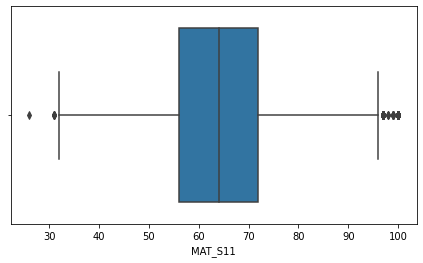

In [16]:
ploting(df,'MAT_S11')

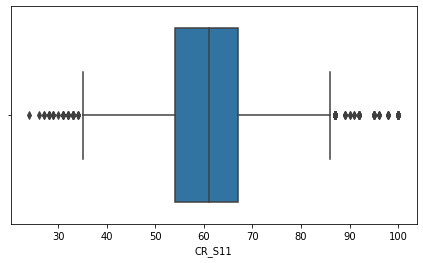

In [17]:
ploting(df,'CR_S11')

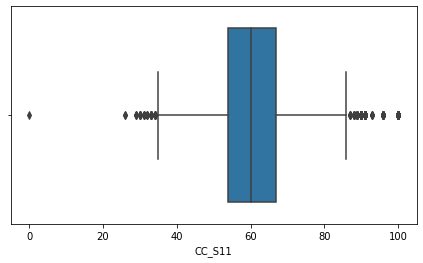

In [18]:
ploting(df,'CC_S11')

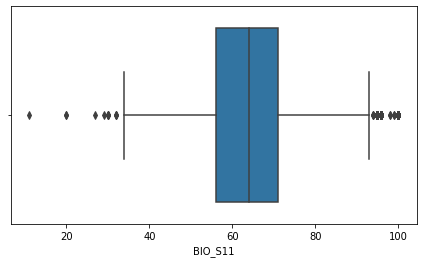

In [19]:
ploting(df,'BIO_S11')

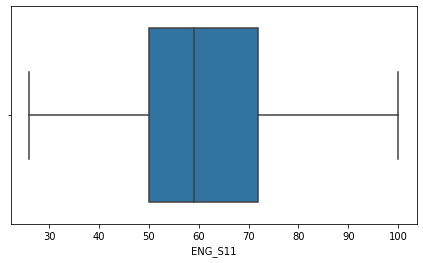

In [20]:
ploting(df,'ENG_S11')

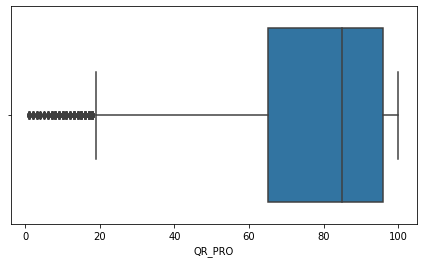

In [21]:
ploting(df,'QR_PRO')

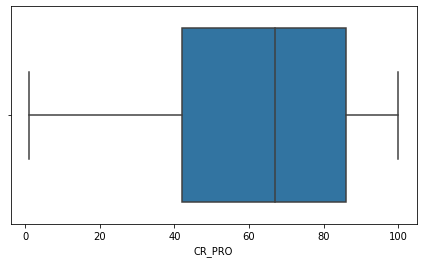

In [22]:
ploting(df,'CR_PRO')

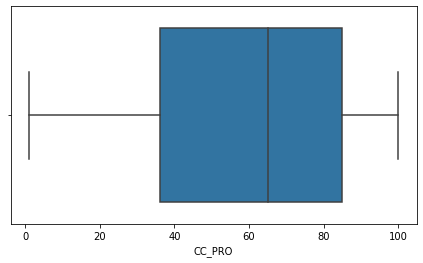

In [23]:
ploting(df,'CC_PRO')

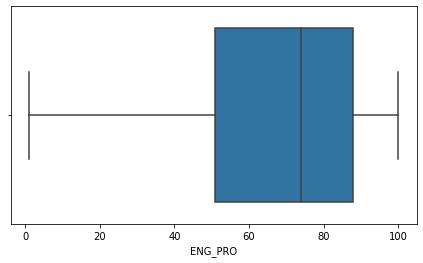

In [24]:
ploting(df,'ENG_PRO')

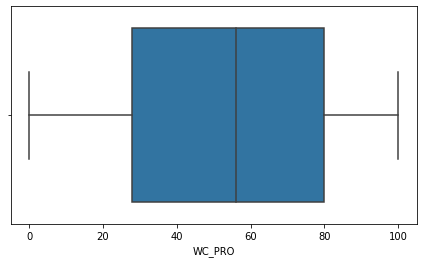

In [25]:
ploting(df,'WC_PRO')

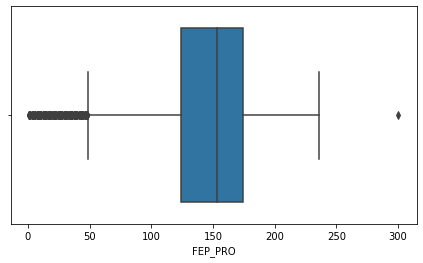

In [26]:
ploting(df,'FEP_PRO')

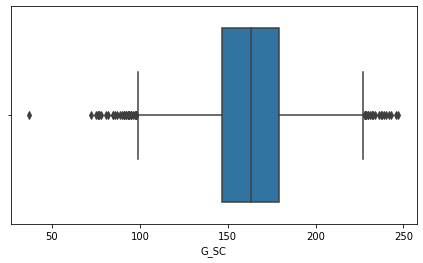

In [27]:
ploting(df,'G_SC')

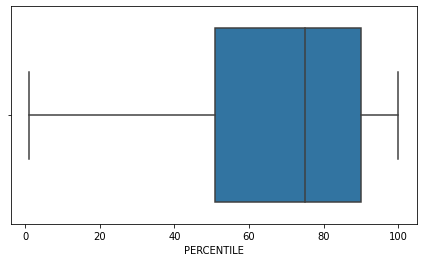

In [28]:
ploting(df,'PERCENTILE')

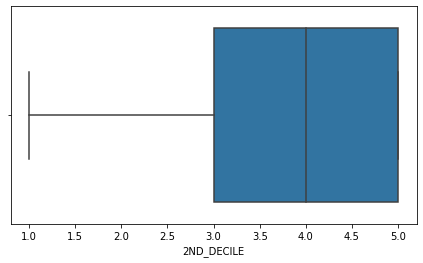

In [29]:
ploting(df,'2ND_DECILE')

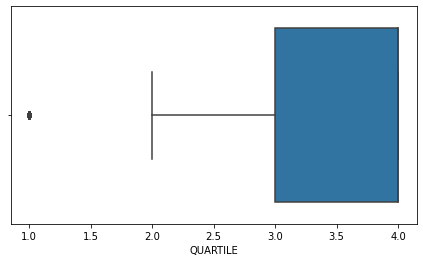

In [30]:
ploting(df,'QUARTILE')

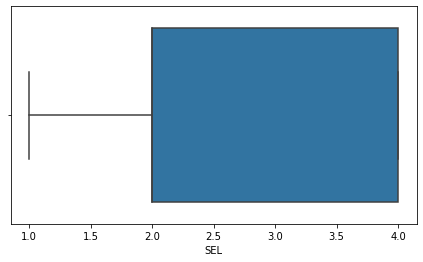

In [31]:
ploting(df,'SEL')

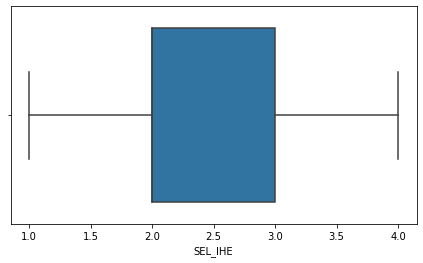

In [32]:
ploting(df,'SEL_IHE')

## Detecting Outliers

In [33]:
# Detecting Outliers 
import numpy as np
outliers = []
def detect_outliers_zscore(df):
    thres = 3
    mean = np.mean(df)
    std = np.std(df)
    # print(mean, std)
    for i in df:
        z_score = (i-mean)/std
        if (np.abs(z_score) > thres):
            outliers.append(i)
    return outliers

In [34]:
mat = detect_outliers_zscore(df['MAT_S11'])
print("Outliers from Z-scores method: ", mat)

Outliers from Z-scores method:  [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 26, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]


In [35]:
cr = detect_outliers_zscore(df['CR_S11'])
print("Outliers from Z-scores method: ", cr)

Outliers from Z-scores method:  [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 26, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 28, 100, 100, 98, 98, 100, 26, 100, 98, 100, 98, 100, 100, 29, 100, 100, 100, 100, 100, 100, 29, 24, 100, 30, 29, 27, 100, 95, 100, 95, 100, 100, 95, 95, 100, 95, 95, 96, 95, 27, 95, 95, 95, 96, 100, 28, 28, 100, 28, 95, 96, 92, 92, 92, 92, 91, 98, 92, 92, 100, 92, 92, 92, 92, 92, 92, 91, 100]


In [36]:
cc = detect_outliers_zscore(df['CC_S11'])
print("Outliers from Z-scores method: ", cc)

Outliers from Z-scores method:  [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 26, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 28, 100, 100, 98, 98, 100, 26, 100, 98, 100, 98, 100, 100, 29, 100, 100, 100, 100, 100, 100, 29, 24, 100, 30, 29, 27, 100, 95, 100, 95, 100, 100, 95, 95, 100, 95, 95, 96, 95, 27, 95, 95, 95, 96, 100, 28, 28, 100, 28, 95, 96, 92, 92, 92, 92, 91, 98, 92, 92, 100, 92, 92, 92, 92, 92, 92, 91, 100, 29, 100, 96, 96, 96, 96, 30, 26, 100, 0, 96, 96, 96, 96, 96, 96, 96, 96, 96, 26, 29, 100, 100, 96, 96, 29, 96, 30, 96, 100, 100, 100, 100, 100, 30, 100, 100, 100, 100, 30, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 1

In [37]:
bio = detect_outliers_zscore(df['BIO_S11'])
print("Outliers from Z-scores method: ", bio)

Outliers from Z-scores method:  [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 26, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 28, 100, 100, 98, 98, 100, 26, 100, 98, 100, 98, 100, 100, 29, 100, 100, 100, 100, 100, 100, 29, 24, 100, 30, 29, 27, 100, 95, 100, 95, 100, 100, 95, 95, 100, 95, 95, 96, 95, 27, 95, 95, 95, 96, 100, 28, 28, 100, 28, 95, 96, 92, 92, 92, 92, 91, 98, 92, 92, 100, 92, 92, 92, 92, 92, 92, 91, 100, 29, 100, 96, 96, 96, 96, 30, 26, 100, 0, 96, 96, 96, 96, 96, 96, 96, 96, 96, 26, 29, 100, 100, 96, 96, 29, 96, 30, 96, 100, 100, 100, 100, 100, 30, 100, 100, 100, 100, 30, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 1

In [38]:
eng = detect_outliers_zscore(df['ENG_S11'])
print("Outliers from Z-scores method: ", eng)

Outliers from Z-scores method:  [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 26, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 28, 100, 100, 98, 98, 100, 26, 100, 98, 100, 98, 100, 100, 29, 100, 100, 100, 100, 100, 100, 29, 24, 100, 30, 29, 27, 100, 95, 100, 95, 100, 100, 95, 95, 100, 95, 95, 96, 95, 27, 95, 95, 95, 96, 100, 28, 28, 100, 28, 95, 96, 92, 92, 92, 92, 91, 98, 92, 92, 100, 92, 92, 92, 92, 92, 92, 91, 100, 29, 100, 96, 96, 96, 96, 30, 26, 100, 0, 96, 96, 96, 96, 96, 96, 96, 96, 96, 26, 29, 100, 100, 96, 96, 29, 96, 30, 96, 100, 100, 100, 100, 100, 30, 100, 100, 100, 100, 30, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 1

In [39]:
qr = detect_outliers_zscore(df['QR_PRO'])
print("Outliers from Z-scores method: ", qr)

Outliers from Z-scores method:  [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 26, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 28, 100, 100, 98, 98, 100, 26, 100, 98, 100, 98, 100, 100, 29, 100, 100, 100, 100, 100, 100, 29, 24, 100, 30, 29, 27, 100, 95, 100, 95, 100, 100, 95, 95, 100, 95, 95, 96, 95, 27, 95, 95, 95, 96, 100, 28, 28, 100, 28, 95, 96, 92, 92, 92, 92, 91, 98, 92, 92, 100, 92, 92, 92, 92, 92, 92, 91, 100, 29, 100, 96, 96, 96, 96, 30, 26, 100, 0, 96, 96, 96, 96, 96, 96, 96, 96, 96, 26, 29, 100, 100, 96, 96, 29, 96, 30, 96, 100, 100, 100, 100, 100, 30, 100, 100, 100, 100, 30, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 1

In [40]:
crpro = detect_outliers_zscore(df['CR_PRO'])
print("Outliers from Z-scores method: ", crpro)

Outliers from Z-scores method:  [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 26, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 28, 100, 100, 98, 98, 100, 26, 100, 98, 100, 98, 100, 100, 29, 100, 100, 100, 100, 100, 100, 29, 24, 100, 30, 29, 27, 100, 95, 100, 95, 100, 100, 95, 95, 100, 95, 95, 96, 95, 27, 95, 95, 95, 96, 100, 28, 28, 100, 28, 95, 96, 92, 92, 92, 92, 91, 98, 92, 92, 100, 92, 92, 92, 92, 92, 92, 91, 100, 29, 100, 96, 96, 96, 96, 30, 26, 100, 0, 96, 96, 96, 96, 96, 96, 96, 96, 96, 26, 29, 100, 100, 96, 96, 29, 96, 30, 96, 100, 100, 100, 100, 100, 30, 100, 100, 100, 100, 30, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 1

In [41]:
ccpro = detect_outliers_zscore(df['CC_PRO'])
print("Outliers from Z-scores method: ", ccpro)

Outliers from Z-scores method:  [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 26, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 28, 100, 100, 98, 98, 100, 26, 100, 98, 100, 98, 100, 100, 29, 100, 100, 100, 100, 100, 100, 29, 24, 100, 30, 29, 27, 100, 95, 100, 95, 100, 100, 95, 95, 100, 95, 95, 96, 95, 27, 95, 95, 95, 96, 100, 28, 28, 100, 28, 95, 96, 92, 92, 92, 92, 91, 98, 92, 92, 100, 92, 92, 92, 92, 92, 92, 91, 100, 29, 100, 96, 96, 96, 96, 30, 26, 100, 0, 96, 96, 96, 96, 96, 96, 96, 96, 96, 26, 29, 100, 100, 96, 96, 29, 96, 30, 96, 100, 100, 100, 100, 100, 30, 100, 100, 100, 100, 30, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 1

In [42]:
engpro = detect_outliers_zscore(df['ENG_PRO'])
print("Outliers from Z-scores method: ", engpro)

Outliers from Z-scores method:  [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 26, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 28, 100, 100, 98, 98, 100, 26, 100, 98, 100, 98, 100, 100, 29, 100, 100, 100, 100, 100, 100, 29, 24, 100, 30, 29, 27, 100, 95, 100, 95, 100, 100, 95, 95, 100, 95, 95, 96, 95, 27, 95, 95, 95, 96, 100, 28, 28, 100, 28, 95, 96, 92, 92, 92, 92, 91, 98, 92, 92, 100, 92, 92, 92, 92, 92, 92, 91, 100, 29, 100, 96, 96, 96, 96, 30, 26, 100, 0, 96, 96, 96, 96, 96, 96, 96, 96, 96, 26, 29, 100, 100, 96, 96, 29, 96, 30, 96, 100, 100, 100, 100, 100, 30, 100, 100, 100, 100, 30, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 1

In [43]:
wcpro = detect_outliers_zscore(df['WC_PRO'])
print("Outliers from Z-scores method: ", wcpro)

Outliers from Z-scores method:  [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 26, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 28, 100, 100, 98, 98, 100, 26, 100, 98, 100, 98, 100, 100, 29, 100, 100, 100, 100, 100, 100, 29, 24, 100, 30, 29, 27, 100, 95, 100, 95, 100, 100, 95, 95, 100, 95, 95, 96, 95, 27, 95, 95, 95, 96, 100, 28, 28, 100, 28, 95, 96, 92, 92, 92, 92, 91, 98, 92, 92, 100, 92, 92, 92, 92, 92, 92, 91, 100, 29, 100, 96, 96, 96, 96, 30, 26, 100, 0, 96, 96, 96, 96, 96, 96, 96, 96, 96, 26, 29, 100, 100, 96, 96, 29, 96, 30, 96, 100, 100, 100, 100, 100, 30, 100, 100, 100, 100, 30, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 1

In [44]:
feppro = detect_outliers_zscore(df['FEP_PRO'])
print("Outliers from Z-scores method: ", feppro)

Outliers from Z-scores method:  [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 26, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 28, 100, 100, 98, 98, 100, 26, 100, 98, 100, 98, 100, 100, 29, 100, 100, 100, 100, 100, 100, 29, 24, 100, 30, 29, 27, 100, 95, 100, 95, 100, 100, 95, 95, 100, 95, 95, 96, 95, 27, 95, 95, 95, 96, 100, 28, 28, 100, 28, 95, 96, 92, 92, 92, 92, 91, 98, 92, 92, 100, 92, 92, 92, 92, 92, 92, 91, 100, 29, 100, 96, 96, 96, 96, 30, 26, 100, 0, 96, 96, 96, 96, 96, 96, 96, 96, 96, 26, 29, 100, 100, 96, 96, 29, 96, 30, 96, 100, 100, 100, 100, 100, 30, 100, 100, 100, 100, 30, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 1

In [45]:
gsc = detect_outliers_zscore(df['G_SC'])
print("Outliers from Z-scores method: ", gsc)

Outliers from Z-scores method:  [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 26, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 28, 100, 100, 98, 98, 100, 26, 100, 98, 100, 98, 100, 100, 29, 100, 100, 100, 100, 100, 100, 29, 24, 100, 30, 29, 27, 100, 95, 100, 95, 100, 100, 95, 95, 100, 95, 95, 96, 95, 27, 95, 95, 95, 96, 100, 28, 28, 100, 28, 95, 96, 92, 92, 92, 92, 91, 98, 92, 92, 100, 92, 92, 92, 92, 92, 92, 91, 100, 29, 100, 96, 96, 96, 96, 30, 26, 100, 0, 96, 96, 96, 96, 96, 96, 96, 96, 96, 26, 29, 100, 100, 96, 96, 29, 96, 30, 96, 100, 100, 100, 100, 100, 30, 100, 100, 100, 100, 30, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 1

In [46]:
percentile = detect_outliers_zscore(df['PERCENTILE'])
print("Outliers from Z-scores method: ", percentile)

Outliers from Z-scores method:  [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 26, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 28, 100, 100, 98, 98, 100, 26, 100, 98, 100, 98, 100, 100, 29, 100, 100, 100, 100, 100, 100, 29, 24, 100, 30, 29, 27, 100, 95, 100, 95, 100, 100, 95, 95, 100, 95, 95, 96, 95, 27, 95, 95, 95, 96, 100, 28, 28, 100, 28, 95, 96, 92, 92, 92, 92, 91, 98, 92, 92, 100, 92, 92, 92, 92, 92, 92, 91, 100, 29, 100, 96, 96, 96, 96, 30, 26, 100, 0, 96, 96, 96, 96, 96, 96, 96, 96, 96, 26, 29, 100, 100, 96, 96, 29, 96, 30, 96, 100, 100, 100, 100, 100, 30, 100, 100, 100, 100, 30, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 1

In [47]:
decile = detect_outliers_zscore(df['2ND_DECILE'])
print("Outliers from Z-scores method: ", decile)

Outliers from Z-scores method:  [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 26, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 28, 100, 100, 98, 98, 100, 26, 100, 98, 100, 98, 100, 100, 29, 100, 100, 100, 100, 100, 100, 29, 24, 100, 30, 29, 27, 100, 95, 100, 95, 100, 100, 95, 95, 100, 95, 95, 96, 95, 27, 95, 95, 95, 96, 100, 28, 28, 100, 28, 95, 96, 92, 92, 92, 92, 91, 98, 92, 92, 100, 92, 92, 92, 92, 92, 92, 91, 100, 29, 100, 96, 96, 96, 96, 30, 26, 100, 0, 96, 96, 96, 96, 96, 96, 96, 96, 96, 26, 29, 100, 100, 96, 96, 29, 96, 30, 96, 100, 100, 100, 100, 100, 30, 100, 100, 100, 100, 30, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 1

In [48]:
quartile = detect_outliers_zscore(df['QUARTILE'])
print("Outliers from Z-scores method: ", quartile)

Outliers from Z-scores method:  [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 26, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 28, 100, 100, 98, 98, 100, 26, 100, 98, 100, 98, 100, 100, 29, 100, 100, 100, 100, 100, 100, 29, 24, 100, 30, 29, 27, 100, 95, 100, 95, 100, 100, 95, 95, 100, 95, 95, 96, 95, 27, 95, 95, 95, 96, 100, 28, 28, 100, 28, 95, 96, 92, 92, 92, 92, 91, 98, 92, 92, 100, 92, 92, 92, 92, 92, 92, 91, 100, 29, 100, 96, 96, 96, 96, 30, 26, 100, 0, 96, 96, 96, 96, 96, 96, 96, 96, 96, 26, 29, 100, 100, 96, 96, 29, 96, 30, 96, 100, 100, 100, 100, 100, 30, 100, 100, 100, 100, 30, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 1

In [49]:
sel = detect_outliers_zscore(df['SEL'])
print("Outliers from Z-scores method: ", sel)

Outliers from Z-scores method:  [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 26, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 28, 100, 100, 98, 98, 100, 26, 100, 98, 100, 98, 100, 100, 29, 100, 100, 100, 100, 100, 100, 29, 24, 100, 30, 29, 27, 100, 95, 100, 95, 100, 100, 95, 95, 100, 95, 95, 96, 95, 27, 95, 95, 95, 96, 100, 28, 28, 100, 28, 95, 96, 92, 92, 92, 92, 91, 98, 92, 92, 100, 92, 92, 92, 92, 92, 92, 91, 100, 29, 100, 96, 96, 96, 96, 30, 26, 100, 0, 96, 96, 96, 96, 96, 96, 96, 96, 96, 26, 29, 100, 100, 96, 96, 29, 96, 30, 96, 100, 100, 100, 100, 100, 30, 100, 100, 100, 100, 30, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 1

In [50]:
selihe = detect_outliers_zscore(df['SEL_IHE'])
print("Outliers from Z-scores method: ", selihe)

Outliers from Z-scores method:  [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 26, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 28, 100, 100, 98, 98, 100, 26, 100, 98, 100, 98, 100, 100, 29, 100, 100, 100, 100, 100, 100, 29, 24, 100, 30, 29, 27, 100, 95, 100, 95, 100, 100, 95, 95, 100, 95, 95, 96, 95, 27, 95, 95, 95, 96, 100, 28, 28, 100, 28, 95, 96, 92, 92, 92, 92, 91, 98, 92, 92, 100, 92, 92, 92, 92, 92, 92, 91, 100, 29, 100, 96, 96, 96, 96, 30, 26, 100, 0, 96, 96, 96, 96, 96, 96, 96, 96, 96, 26, 29, 100, 100, 96, 96, 29, 96, 30, 96, 100, 100, 100, 100, 100, 30, 100, 100, 100, 100, 30, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 1

## Finding IQR

In [51]:
def finding_Iqr(df,st):
    #lets find the IQR (inter quantile range)
    Q1 = df[st].quantile(0.25)
    Q3 = df[st].quantile(0.75)
    IQR = Q3-Q1
    lower_boundry = Q1 -1.5*IQR
    upper_boundry = Q3 +1.5*IQR
    
    return lower_boundry , upper_boundry

In [52]:
lower_MAT_S11, upper_MAT_S11 = finding_Iqr(df,'MAT_S11')
print('upper limit is' , upper_MAT_S11)
print('lower limit is' , lower_MAT_S11)

upper limit is 96.0
lower limit is 32.0


In [53]:
lower_CR_S11, upper_CR_S11 = finding_Iqr(df,'CR_S11')
print('upper limit is' , upper_CR_S11)
print('lower limit is' , lower_CR_S11)

upper limit is 86.5
lower limit is 34.5


In [54]:
lower_CC_S11, upper_CC_S11 = finding_Iqr(df,'CC_S11')
print('upper limit is' , upper_CC_S11)
print('lower limit is' , lower_CC_S11)

upper limit is 86.5
lower limit is 34.5


In [55]:
lower_BIO_S11, upper_BIO_S11 = finding_Iqr(df,'BIO_S11')
print('upper limit is' , upper_BIO_S11)
print('lower limit is' , lower_BIO_S11)

upper limit is 93.5
lower limit is 33.5


In [56]:
lower_ENG_S11, upper_ENG_S11 = finding_Iqr(df,'ENG_S11')
print('upper limit is' , upper_ENG_S11)
print('lower limit is' , lower_ENG_S11)

upper limit is 105.0
lower limit is 17.0


In [57]:
lower_QR_PRO, upper_QR_PRO = finding_Iqr(df,'QR_PRO')
print('upper limit is' , upper_QR_PRO)
print('lower limit is' , lower_QR_PRO)

upper limit is 142.5
lower limit is 18.5


In [58]:
lower_CR_PRO, upper_CR_PRO = finding_Iqr(df,'CR_PRO')
print('upper limit is' , upper_CR_PRO)
print('lower limit is' , lower_CR_PRO)

upper limit is 152.0
lower limit is -24.0


In [59]:
lower_ENG_PRO, upper_ENG_PRO = finding_Iqr(df,'ENG_PRO')
print('upper limit is' , upper_CR_PRO)
print('lower limit is' , lower_CR_PRO)

upper limit is 152.0
lower limit is -24.0


In [60]:
lower_WC_PRO, upper_WC_PRO = finding_Iqr(df,'WC_PRO')
print('upper limit is' , upper_WC_PRO)
print('lower limit is' , lower_WC_PRO)

upper limit is 158.0
lower limit is -50.0


In [61]:
lower_FEP_PRO, upper_FEP_PRO = finding_Iqr(df,'FEP_PRO')
print('upper limit is' , upper_FEP_PRO)
print('lower limit is' , lower_FEP_PRO)

upper limit is 249.0
lower limit is 49.0


In [62]:
lower_G_SC, upper_G_SC = finding_Iqr(df,'G_SC')
print('upper limit is' , upper_G_SC)
print('lower limit is' , lower_G_SC)

upper limit is 227.0
lower limit is 99.0


In [63]:
lower_PERCENTILE, upper_PERCENTILE = finding_Iqr(df,'PERCENTILE')
print('upper limit is' , upper_PERCENTILE)
print('lower limit is' , lower_PERCENTILE)

upper limit is 148.5
lower limit is -7.5


In [64]:
lower_2ND_DECILE, upper_2ND_DECILE = finding_Iqr(df,'2ND_DECILE')
print('upper limit is' , upper_2ND_DECILE)
print('lower limit is' , lower_2ND_DECILE)

upper limit is 8.0
lower limit is 0.0


In [65]:
lower_QUARTILE, upper_QUARTILE = finding_Iqr(df,'QUARTILE')
print('upper limit is' , upper_QUARTILE)
print('lower limit is' , lower_QUARTILE)

upper limit is 5.5
lower limit is 1.5


In [66]:
lower_SEL, upper_SEL = finding_Iqr(df,'SEL')
print('upper limit is' , upper_SEL)
print('lower limit is' , lower_SEL)

upper limit is 7.0
lower limit is -1.0


In [67]:
lower_SEL_IHE, upper_SEL_IHE = finding_Iqr(df,'SEL_IHE')
print('upper limit is' , upper_SEL_IHE)
print('lower limit is' , lower_SEL_IHE)

upper limit is 4.5
lower limit is 0.5


## Removing Outliers

In [68]:
#Removing Outliers
outliers_MAT_S11 = np.where(df['MAT_S11'] > upper_MAT_S11,True ,np.where(df['MAT_S11']< lower_MAT_S11, True , False))
outliers_MAT_S11

array([False, False, False, ..., False, False, False])

In [69]:
#Removing Outliers
outliers_CR_S11 = np.where(df['CR_S11'] > upper_CR_S11,True ,np.where(df['CR_S11']< lower_CR_S11, True , False))
outliers_CR_S11

array([False, False, False, ..., False, False, False])

In [70]:
#Removing Outliers
outliers_CC_S11 = np.where(df['CC_S11'] > upper_CC_S11,True ,np.where(df['CC_S11']< lower_CC_S11, True , False))
outliers_CC_S11

array([False, False, False, ..., False, False, False])

In [71]:
#Removing Outliers
outliers_BIO_S11 = np.where(df['BIO_S11'] > upper_BIO_S11,True ,np.where(df['BIO_S11']< lower_BIO_S11, True , False))
outliers_BIO_S11

array([False,  True, False, ..., False, False, False])

In [72]:
#Removing Outliers
outliers_QR_PRO = np.where(df['QR_PRO'] > upper_QR_PRO,True ,np.where(df['QR_PRO']< lower_QR_PRO, True , False))
outliers_QR_PRO

array([False, False,  True, ..., False, False, False])

In [73]:
#Removing Outliers
outliers_FEP_PRO = np.where(df['FEP_PRO'] > upper_FEP_PRO,True ,np.where(df['FEP_PRO']< lower_FEP_PRO, True , False))
outliers_FEP_PRO

array([False, False, False, ..., False, False, False])

In [74]:
#Removing Outliers
outliers_G_SC = np.where(df['G_SC'] > upper_G_SC,True ,np.where(df['G_SC']< lower_G_SC, True , False))
outliers_G_SC

array([False, False, False, ..., False, False, False])

In [75]:
#Removing Outliers
outliers_QUARTILE = np.where(df['QUARTILE'] > upper_QUARTILE,True ,np.where(df['QUARTILE']< lower_QUARTILE, True , False))
outliers_QUARTILE

array([False, False,  True, ..., False, False, False])

In [76]:
df['MAT_S11']= np.where(df['MAT_S11']> upper_MAT_S11 , upper_MAT_S11,np.where(df['MAT_S11'] < lower_MAT_S11 , lower_MAT_S11 ,df['MAT_S11']))
df['CR_S11']= np.where(df['CR_S11']> upper_CR_S11 , upper_CR_S11,np.where(df['CR_S11'] < lower_CR_S11 , lower_CR_S11 ,df['CR_S11']))
df['CC_S11']= np.where(df['CC_S11']> upper_CC_S11 , upper_CC_S11,np.where(df['CC_S11'] < lower_CC_S11 , lower_CC_S11,df['CC_S11']))
df['BIO_S11']= np.where(df['BIO_S11']> upper_BIO_S11 , upper_BIO_S11,np.where(df['BIO_S11'] < lower_BIO_S11 , lower_BIO_S11,df['BIO_S11']))
df['QR_PRO']= np.where(df['QR_PRO']> upper_QR_PRO , upper_QR_PRO,np.where(df['QR_PRO'] < lower_QR_PRO , lower_QR_PRO,df['QR_PRO']))
df['FEP_PRO']= np.where(df['FEP_PRO']> upper_FEP_PRO , upper_FEP_PRO,np.where(df['FEP_PRO'] < lower_FEP_PRO , lower_FEP_PRO,df['FEP_PRO']))
df['G_SC']= np.where(df['G_SC']> upper_G_SC , upper_G_SC,np.where(df['G_SC'] < lower_G_SC , lower_G_SC,df['G_SC']))
df['QUARTILE']= np.where(df['QUARTILE']> upper_QUARTILE , upper_QUARTILE,np.where(df['QUARTILE'] < lower_QUARTILE , lower_QUARTILE,df['QUARTILE']))

## After Removing Outliers

In [77]:
def boxplt(df,st):
    plt.figure(figsize=(16,4))
    plt.subplot(1,2,2)
    sns.boxplot(df[st])
    plt.show()

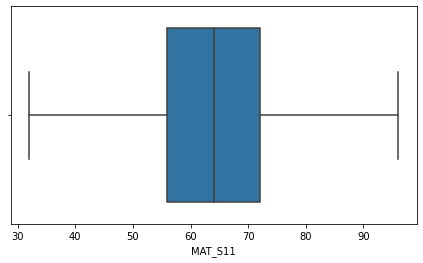

In [78]:
boxplt(df, 'MAT_S11')

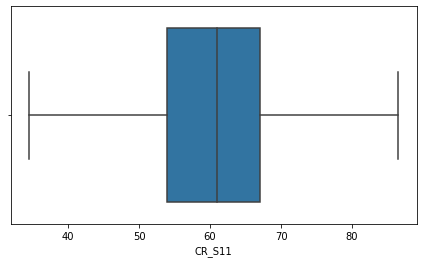

In [79]:
boxplt(df, 'CR_S11')

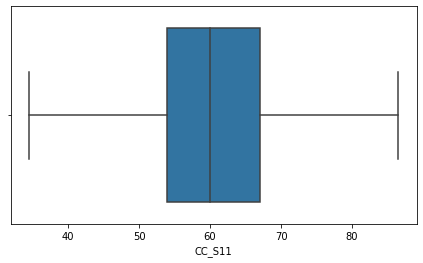

In [80]:
boxplt(df, 'CC_S11')

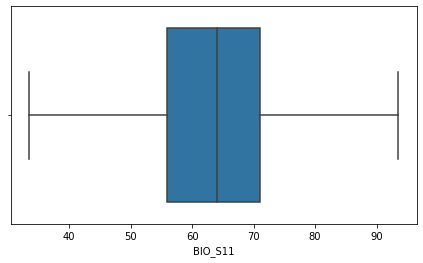

In [81]:
boxplt(df, 'BIO_S11')

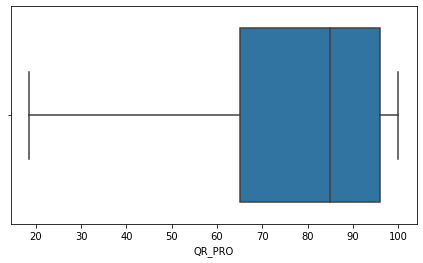

In [82]:
boxplt(df, 'QR_PRO')

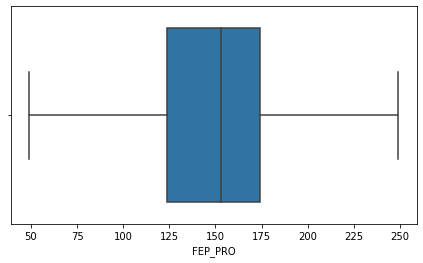

In [83]:
boxplt(df, 'FEP_PRO')

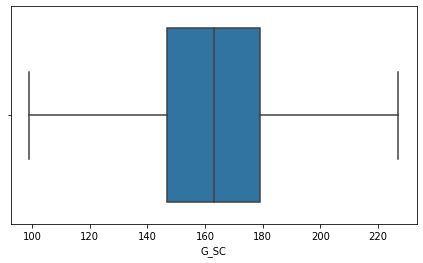

In [84]:
boxplt(df, 'G_SC')

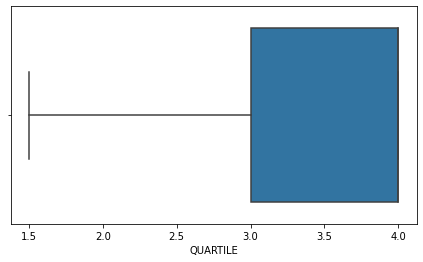

In [85]:
boxplt(df, 'QUARTILE')

3. Apply data transformations on at least one of the variables. The purpose of this transformation should be one of the following reasons: to change the scale for better understanding of the variable, to convert a non-linear relation into a linear one, or to decrease the skewness and convert the distribution into a normal distribution.

In [86]:
df.head()

,COD_S11,GENDER,EDU_FATHER,EDU_MOTHER,OCC_FATHER,OCC_MOTHER,STRATUM,SISBEN,PEOPLE_HOUSE,INTERNET,...,CC_PRO,ENG_PRO,WC_PRO,FEP_PRO,G_SC,PERCENTILE,2ND_DECILE,QUARTILE,SEL,SEL_IHE
0,SB11201210000129,F,Incomplete Professional Education,Complete technique or technology,Technical or professional level employee,Home,Stratum 4,It is not classified by the SISBEN,Three,Yes,...,71,93,79,181.0,180.0,91,5,4.0,2,2
1,SB11201210000137,F,Complete Secundary,Complete professional education,Entrepreneur,Independent professional,Stratum 5,It is not classified by the SISBEN,Three,Yes,...,86,98,78,201.0,182.0,92,5,4.0,4,4
2,SB11201210005154,M,Not sure,Not sure,Independent,Home,Stratum 2,Level 2,Five,No,...,18,43,22,113.0,113.0,7,1,1.5,1,1
3,SB11201210007504,F,Not sure,Not sure,Other occupation,Independent,Stratum 2,It is not classified by the SISBEN,Three,Yes,...,76,80,48,137.0,157.0,67,4,3.0,2,2
4,SB11201210007548,M,Complete professional education,Complete professional education,Executive,Home,Stratum 4,It is not classified by the SISBEN,One,Yes,...,98,100,71,189.0,198.0,98,5,4.0,4,2


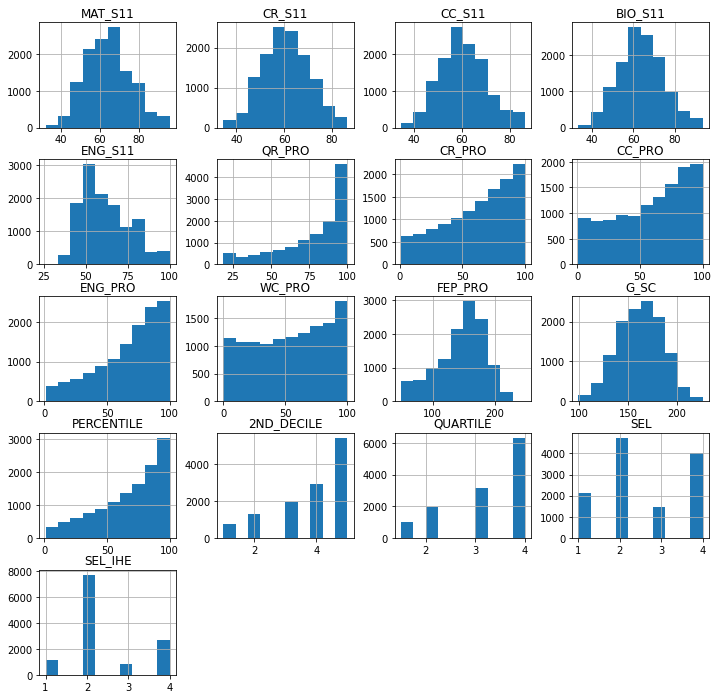

In [87]:
df.hist(figsize=(12,12))
plt.show()

In [88]:
X = df.iloc[:,[24,25,26,27,28,32,33,34,35,36,37,38,39,40]]

In [89]:
X.head(5)

,MAT_S11,CR_S11,CC_S11,BIO_S11,ENG_S11,QR_PRO,CR_PRO,CC_PRO,ENG_PRO,WC_PRO,FEP_PRO,G_SC,PERCENTILE,2ND_DECILE
0,71.0,81.0,61.0,86.0,82,71.0,93,71,93,79,181.0,180.0,91,5
1,83.0,75.0,66.0,93.5,88,97.0,38,86,98,78,201.0,182.0,92,5
2,52.0,49.0,38.0,46.0,42,18.5,1,18,43,22,113.0,113.0,7,1
3,56.0,55.0,51.0,64.0,73,65.0,35,76,80,48,137.0,157.0,67,4
4,80.0,65.0,76.0,85.0,92,94.0,94,98,100,71,189.0,198.0,98,5


In [90]:
from sklearn.preprocessing import MinMaxScaler

In [91]:
scaler=MinMaxScaler(feature_range=(0, 1))
scaler.fit(X)

MinMaxScaler()

In [92]:
scaled_data=scaler.transform(X)

In [93]:
scaled_data

array([[0.609375  , 0.89423077, 0.50961538, ..., 0.6328125 , 0.90909091,
        1.        ],
       [0.796875  , 0.77884615, 0.60576923, ..., 0.6484375 , 0.91919192,
        1.        ],
       [0.3125    , 0.27884615, 0.06730769, ..., 0.109375  , 0.06060606,
        0.        ],
       ...,
       [0.53125   , 0.66346154, 0.77884615, ..., 0.6953125 , 0.94949495,
        1.        ],
       [0.328125  , 0.66346154, 0.56730769, ..., 0.3671875 , 0.49494949,
        0.5       ],
       [0.734375  , 0.58653846, 0.52884615, ..., 0.6171875 , 0.88888889,
        1.        ]])

---------------END---------------